In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn import feature_selection
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from tab2img.converter import Tab2Img
from matplotlib import pyplot as plt

In [3]:
# Load the processed dataset
dataset = pd.read_csv("../DataSets/GSE63060.csv")
dataset.head()

,Unnamed: 0,sample_id,status,ethnicity,age,gender,included in case -control study,tissue,A1BG,A1CF,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,0,GSM1539080,MCI,Western European,65,Female,yes,blood,7.600951,7.439318,...,7.439235,7.436031,7.386264,7.464524,8.046962,7.462498,10.618034,11.736463,8.561519,7.525411
1,1,GSM1539081,MCI,Other Caucasian,66,Female,yes,blood,7.672496,7.469146,...,7.391362,7.616271,7.383703,7.756510,8.021271,7.472825,11.289126,11.930612,8.697649,7.666053
2,2,GSM1539082,MCI,Western European,67,Female,yes,blood,7.538046,7.478494,...,7.426011,7.435217,7.452354,7.560671,8.010362,7.435084,11.068854,11.626505,8.889266,7.771253
3,3,GSM1539083,MCI,Unknown,67,Female,yes,blood,7.577860,7.486963,...,7.519947,7.464119,7.451809,7.528391,8.034714,7.377990,10.527572,11.954639,8.665815,7.696854
4,4,GSM1539084,MCI,Western European,67,Female,yes,blood,7.678150,7.446429,...,7.489877,7.520285,7.381160,7.624256,7.990016,7.453386,10.833655,11.895018,8.785981,7.647086


In [5]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
x_scaled_values = scaler.fit_transform(dataset.iloc[:, 8:].values)
dataset.iloc[:, 8:] = x_scaled_values
dataset.head()

,Unnamed: 0,sample_id,status,ethnicity,age,gender,included in case -control study,tissue,A1BG,A1CF,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,0,GSM1539080,MCI,Western European,65,Female,yes,blood,0.377218,0.301047,...,0.338474,0.145509,0.144588,0.063263,0.474984,0.566939,0.541204,0.634291,0.475246,0.052385
1,1,GSM1539081,MCI,Other Caucasian,66,Female,yes,blood,0.511419,0.418467,...,0.180355,0.630934,0.133608,0.551752,0.436841,0.597108,0.913438,0.742332,0.600047,0.204015
2,2,GSM1539082,MCI,Western European,67,Female,yes,blood,0.259223,0.455267,...,0.294798,0.143318,0.427880,0.224115,0.420645,0.486848,0.791260,0.573102,0.775717,0.317433
3,3,GSM1539083,MCI,Unknown,67,Female,yes,blood,0.333904,0.488604,...,0.605054,0.221156,0.425543,0.170111,0.456799,0.320051,0.491027,0.755702,0.570861,0.237222
4,4,GSM1539084,MCI,Western European,67,Female,yes,blood,0.522025,0.329040,...,0.505739,0.372423,0.122707,0.330492,0.390437,0.540318,0.660802,0.722524,0.681027,0.183566


In [4]:
dataset = dataset[dataset["status"] != "MCI"]
dataset.head()

,Unnamed: 0,sample_id,status,ethnicity,age,gender,included in case -control study,tissue,A1BG,A1CF,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
39,39,GSM1539119,CTL,Western European,58,Female,yes,blood,7.587775,7.469983,...,7.525623,7.437503,7.505324,7.584721,7.850838,7.472690,10.079319,11.165482,8.210077,8.026768
40,40,GSM1539120,CTL,Western European,60,Female,yes,blood,7.557308,7.447469,...,7.444166,7.467127,7.371849,7.861543,7.893644,7.405630,10.191520,10.893758,8.320571,8.178155
41,41,GSM1539121,CTL,Other Caucasian,64,Female,yes,blood,7.647377,7.478949,...,7.549363,7.427298,7.470334,7.629674,7.892479,7.453859,9.698113,10.974747,8.503586,8.042123
42,42,GSM1539122,CTL,Western European,65,Female,yes,blood,7.790441,7.404891,...,7.465682,7.588677,7.418981,7.735162,7.808023,7.430329,10.073445,11.276238,8.519029,8.066685
43,43,GSM1539123,CTL,Western European,65,Female,yes,blood,7.550958,7.485507,...,7.420697,7.507535,7.445960,7.637890,7.855971,7.451352,9.849590,10.941022,8.332682,7.954694


In [34]:
K = 400
gene_index = []
selected_genes = []

chi2 = feature_selection.SelectKBest(feature_selection.chi2, k=K)
chi2.fit_transform(dataset.iloc[:, 8:].values, dataset.iloc[:, 2])
chi2_support = chi2.get_support()

for i in range(len(chi2_support)):
    if(chi2_support[i] == True):
        gene_index.append(i)

index = 0
for i in gene_index:
    selected_genes.append(dataset.columns[i+8])
    print(dataset.columns[i+8])
    index += 1

ACAT1
ACTN1
ACTR6
ADAM8
AIF1
AKR1C3
ANAPC13
ANXA1
ARHGAP4
ARL6IP5
ARPC3
ASNSD1
ATG16L2
ATHL1
ATP5C1
ATP5EP2
ATP5F1
ATP5I
ATP5J
ATP5J2
ATP5L
ATP5O
ATP6V1D
ATP6V1E1
ATP6V1G1
BEST1
BEX2
BOLA2
BOLA3
BTF3
BXDC1
C10ORF54
C11ORF1
C11ORF10
C13ORF27
C14ORF112
C14ORF156
C14ORF166
C14ORF2
C15ORF15
C16ORF61
C16ORF7
C17ORF62
C1ORF218
C1ORF41
C5ORF41
C6ORF130
C6ORF160
C7ORF43
C8ORF59
C9ORF46
CALM2
CASP1
CCDC53
CCDC59
CCDC72
CCT2
CD3D
CD52
CDC26
CEBPZ
CECR6
CETN2
CHMP5
CIP29
CISD1
CKLF
CLC
CLEC4A
CMTM2
CNBP
COMMD3
COMMD6
COPS4
COPS5
COX17
COX6A1
COX6C
COX7A2
COX7B
COX7C
CPEB4
CRIPAK
CRISPLD2
CUEDC1
CWC15
CWF19L2
CXORF26
DBI
DDX1
DEK
DGKQ
DNAJA1
DNAJA2
DNAJC8
DPM1
DPY30
DYSF
E2F3
EDG4
EIF1AY
EIF2A
EIF3E
EIF4A2
EMG1
ENY2
ERH
FCER1A
FES
FGL2
FLJ42957
FOLR3
FRG1
FXR1
GDI2
GIMAP7
GLRX
GMFG
GNG11
GNL2
GNL3
GRN
GTF2B
GTF2F2
GTF2H5
GZMA
H2AFZ
HBQ1
HCG27
HDDC2
HECA
HIGD1A
HINT1
HK3
HLA-A29.1
HLA-DRB1
HLA-DRB5
HLA-H
HMGB2
HNRPA2B1
HS.131087
HS.171171
HS.193767
HS.347034
HS.508682
HSP90AA1
HSPA8
HSPE1
HSPH1
IFI

In [35]:
X = dataset[selected_genes].values
Y = dataset["status"].values

In [36]:
#Label encoding
def LabelEncoding(Y): 
    le = preprocessing.LabelEncoder()
    le.fit(Y)
    Y = le.transform(Y)
    return Y

Y = LabelEncoding(Y)

print(Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [41]:
data_to_image_model = Tab2Img()
X_images = data_to_image_model.fit_transform(X, Y)

(20, 20)


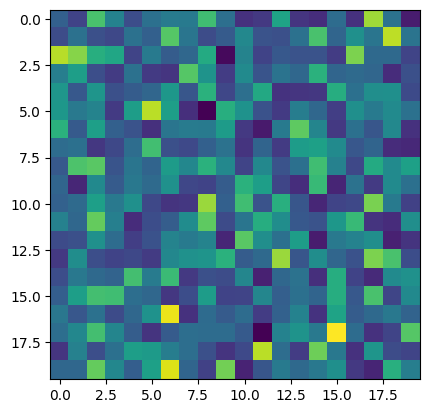

In [45]:
print(X_images[0].shape)
plt.imshow(X_images[20], interpolation='nearest')
plt.show()

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X_images, Y, test_size=0.30, shuffle=True)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(20, 20, 1)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    steps_per_epoch=len(x_train),
    validation_data=(x_test, y_test),
    validation_steps=len(x_test)
)